# Pytorch Workflow

In [103]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating the model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating the model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [104]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.7.0+cpu'

In [105]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [106]:
len(X), len(y)

(50, 50)

In [107]:
# Splitting data into training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [108]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

    # Show legend
    plt.legend(prop={"size": 14})

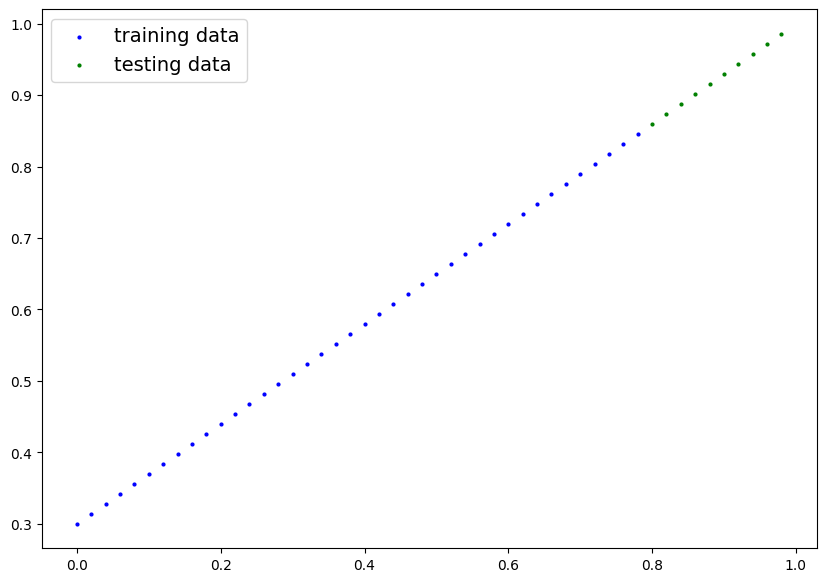

In [109]:
plot_predictions()

# Building the Model

In [110]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [111]:
# Create random seed
torch.manual_seed(42)

# Create instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [112]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using torch.inference_mode()

In [113]:
with torch.inference_mode():
    y_preds = model_0(X_test)

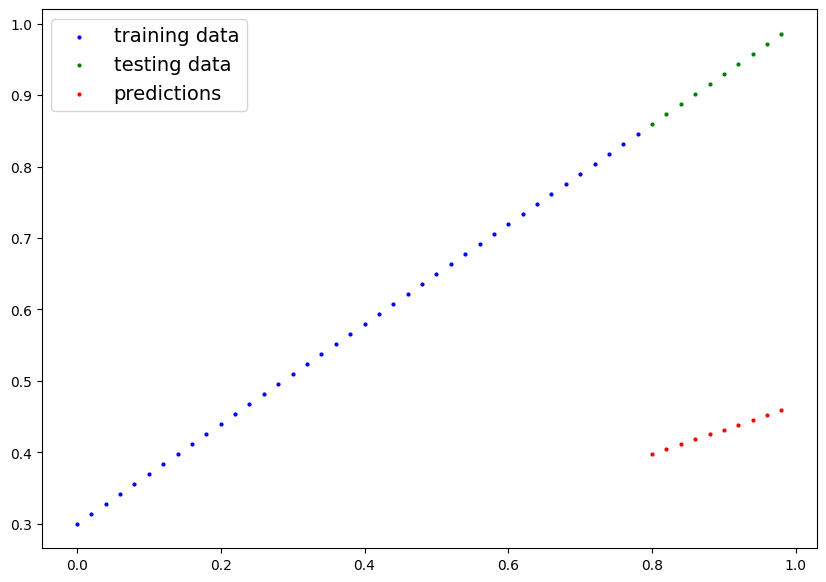

In [114]:
plot_predictions(predictions=y_preds)

## Train model

In [115]:
# Check out our model's parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [116]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)  # learning rate probably the most important hyperparameter

In [117]:
# An epoch is one loop through the data... (hyperparameter)
epochs = 200

# Track different values
epoch_count = []
train_loss_values = []
test_loss_values = []

# 0. Loop through data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()  # sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)  # input first (y_pred), target next (y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()

    # Testing
    model_0.eval()  # turn off gradient tracking

    with torch.inference_mode():
        # 1. Forward pass
        test_pred = model_0(X_test)

        # 2. Calculate loss
        test_loss = loss_fn(test_pred, y_test)

    # print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Loss: 0.03

In [118]:
import numpy as np

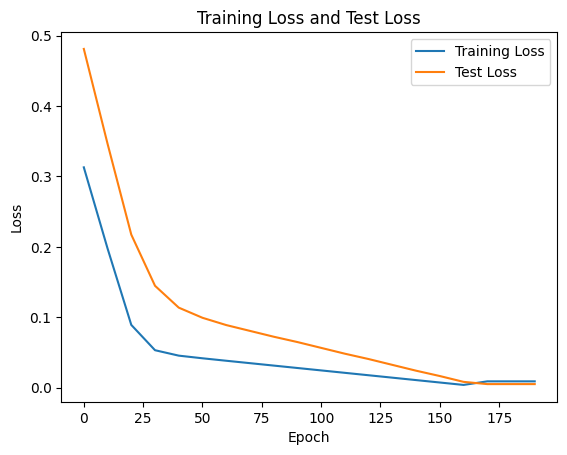

In [119]:
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label="Training Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training Loss and Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

## Saving a model

In [120]:
from pathlib import Path

# 1. Create dir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving model to models\01_pytorch_workflow_model_0.pth


## Loading a model

In [121]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [122]:
# we will load only the state dict -> new instance of our class
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [123]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [124]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_0_preds = loaded_model_0(X_test)
loaded_model_0_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [125]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [126]:
loaded_model_0_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together

In [127]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(f"Using torch version {torch.__version__}")

Using torch version 2.7.0+cpu


In [128]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} as device")

Using cpu as device


In [129]:
# Creating some data using linear regression formula y = weight * X + bias
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [130]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

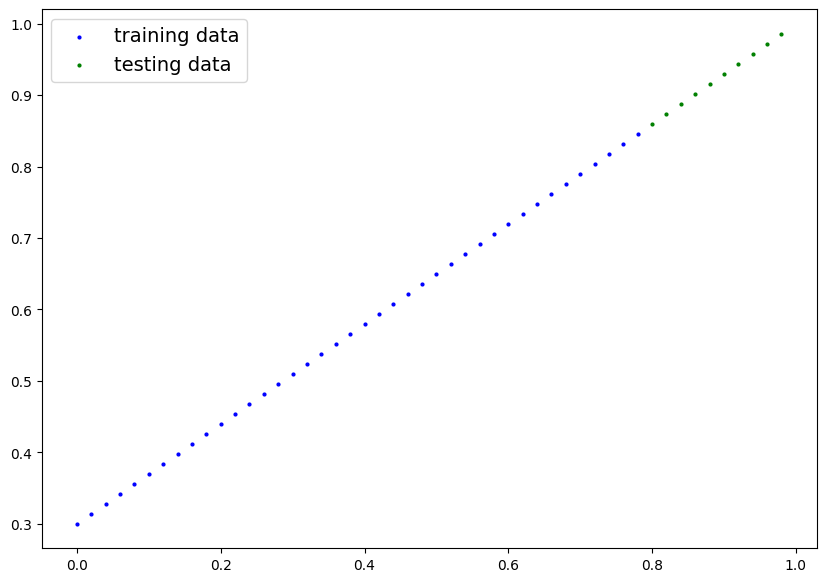

In [131]:
# Plot data
plot_predictions(X_train, y_train, X_test, y_test)

## Creating model

In [132]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


# Set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

## Training

In [133]:
# Loss function + optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(lr=0.01, params=model_1.parameters())

In [140]:
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # TESTING
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 10 | Loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 20 | Loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 30 | Loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 40 | Loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 50 | Loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 60 | Loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 70 | Loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 80 | Loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 90 | Loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 100 | Loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 110 | Loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 120 | Loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 130 | Loss: 0.010256484150886

## Plotting

In [141]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

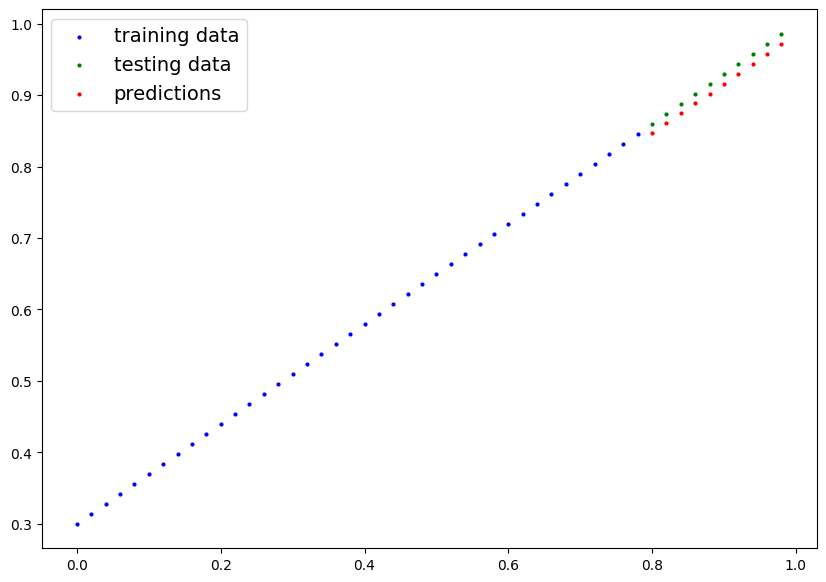

In [142]:
model_1.eval()
with torch.inference_mode():
    y_pred = model_1(X_test)
plot_predictions(predictions=y_pred)

## Saving

In [146]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving model to {MODEL_SAVE_PATH}")

torch.save(model_1.state_dict(), MODEL_SAVE_PATH)

Saving model to models\01_pytorch_workflow_model_1.pth


## Loading

In [151]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

## Eval loaded model

In [153]:
## loaded model eval
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

## original model eval
model_1.eval()
with torch.inference_mode():
    y_pred = model_1(X_test)

## output the same?
y_pred == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])